In [6]:
from fl_puf.FederatedDataset.PartitionTypes.representative import Representative
from fl_puf.FederatedDataset.PartitionTypes.balanced_and_unbalanced import BalancedAndUnbalanced

import torch
from fl_puf.FederatedDataset.Utils.utils import PartitionUtils
from DPL.Utils.dataset_utils import DatasetUtils
from fl_puf.Utils.utils import Utils
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import torch
import numpy as np 

In [15]:
# plot the bar plot of the disparities
def plot_bar_plot(title: str, disparities: list, nodes: list):
    plt.figure(figsize=(20, 8))
    plt.bar(range(len(disparities)), disparities)
    plt.xticks(range(len(nodes)), nodes)
    plt.title(title)
    # add a vertical line on xtick=75
    # plt.axvline(x=75, color="r", linestyle="--")
    plt.xticks(rotation=90)
    # plt.show()
    # font size x axis
    plt.rcParams.update({"font.size": 10})
    # plt.savefig(f"./{title}.png")
    plt.tight_layout()

In [8]:
labels = []
groups = []
combinations = []
for client in range(0,51):
    label = np.load(f'./data/Tabular/income/federated/{client}/income_labels_{client}.npy')
    labels.append(label)
    group = np.load(f'./data/Tabular/income/federated/{client}/income_groups_{client}.npy')
    groups.append(group)
    combinations_tmp = []
    for l, sv in zip(label, group):
        combinations_tmp.append((l, sv))
    combinations.append(combinations_tmp)

In [11]:
disparities = Representative.compute_disparities_debug(predictions=labels, sensitive_features=groups)

Mean of disparity 0.16020295940668366 - std 0.03814889784633062


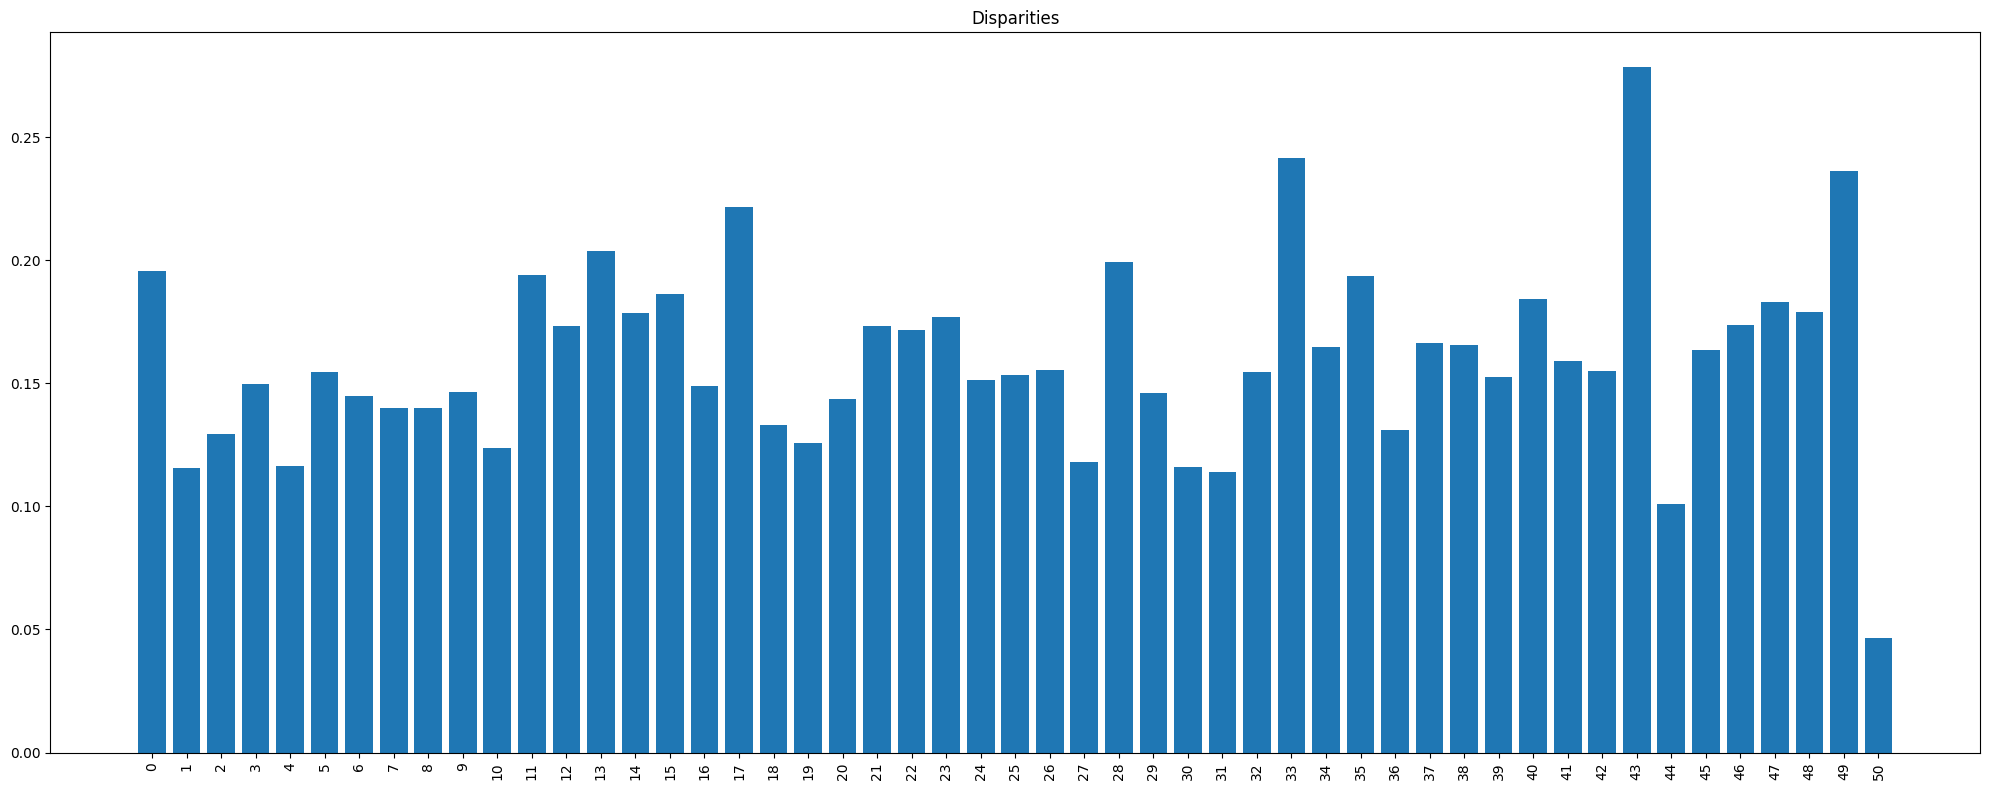

In [17]:
plot_bar_plot(
            title="Disparities",
            disparities=disparities,
            nodes=[f"{i}" for i in range(len(disparities))],
        )

Counter({(0, 0): 8423, (0, 1): 6921, (1, 1): 4701, (1, 0): 2223})
Counter({(0, 1): 4229, (0, 0): 3880, (1, 1): 619, (1, 0): 343})


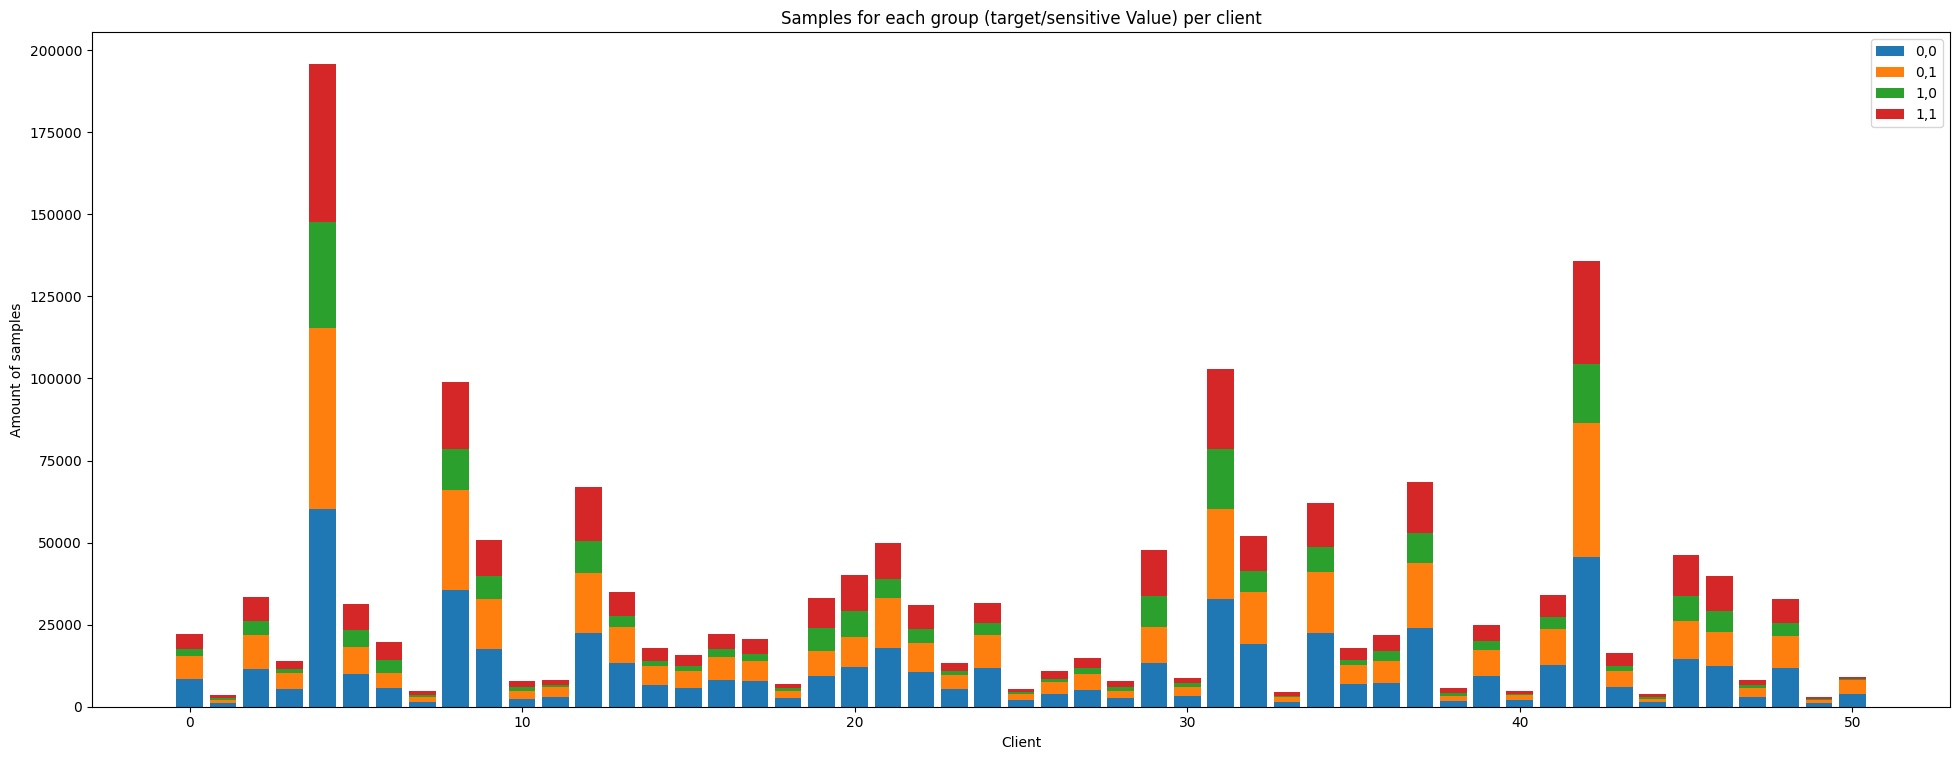

In [18]:
counter_groups = [Counter(client_data) for client_data in combinations]
print(counter_groups[0])
print(counter_groups[-1])
counter_group_0_0 = [counter[(0, 0.0)] for counter in counter_groups]
counter_group_0_1 = [counter[(0, 1.0)] for counter in counter_groups]
counter_group_1_0 = [counter[(1, 0.0)] for counter in counter_groups]
counter_group_1_1 = [counter[(1, 1.0)] for counter in counter_groups]

 # plot a barplot with counter_group_0_0, counter_group_0_1, counter_group_1_0, counter_group_1_1
 # for each client in the same plot
plt.figure(figsize=(20, 8))

plt.bar(range(len(counter_group_0_0)), counter_group_0_0)
plt.bar(range(len(counter_group_0_1)), counter_group_0_1, bottom=counter_group_0_0)
plt.bar(range(len(counter_group_1_0)), counter_group_1_0, bottom=[sum(x) for x in zip(counter_group_0_0, counter_group_0_1)])
plt.bar(range(len(counter_group_1_1)), counter_group_1_1, bottom=[sum(x) for x in zip(counter_group_0_0, counter_group_0_1, counter_group_1_0)])



plt.xlabel("Client")
plt.ylabel("Amount of samples")
plt.title("Samples for each group (target/sensitive Value) per client")
plt.legend(["0,0", "0,1", "1,0", "1,1"])
# font size 20
plt.rcParams.update({'font.size': 20}) 
plt.tight_layout()

#group_to_reduce=(0,1), group_to_increment=(1,1),
# 0, 0 -> 1, 0